# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.83'

### Load in the data

In [2]:
# Get from here - https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Fluid_Inclusion_Densities_Example1.xlsx
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.560838,1.561214,0.066414,0.065248,5.892844,5.894266,0.250741,0.246342,50,0,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.416302,1.415687,0.066616,0.067509,5.347157,5.344838,0.251503,0.254876,50,0,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.673638,1.672603,0.071578,0.071326,6.318713,6.314807,0.270238,0.269287,50,0,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.866726,1.865741,0.083736,0.080685,7.047707,7.043989,0.316141,0.304622,50,0,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.792591,1.790348,0.079793,0.075475,6.767816,6.759345,0.301255,0.284950,50,0,0.0,1307.970102,0.482227,None,2700,SW96


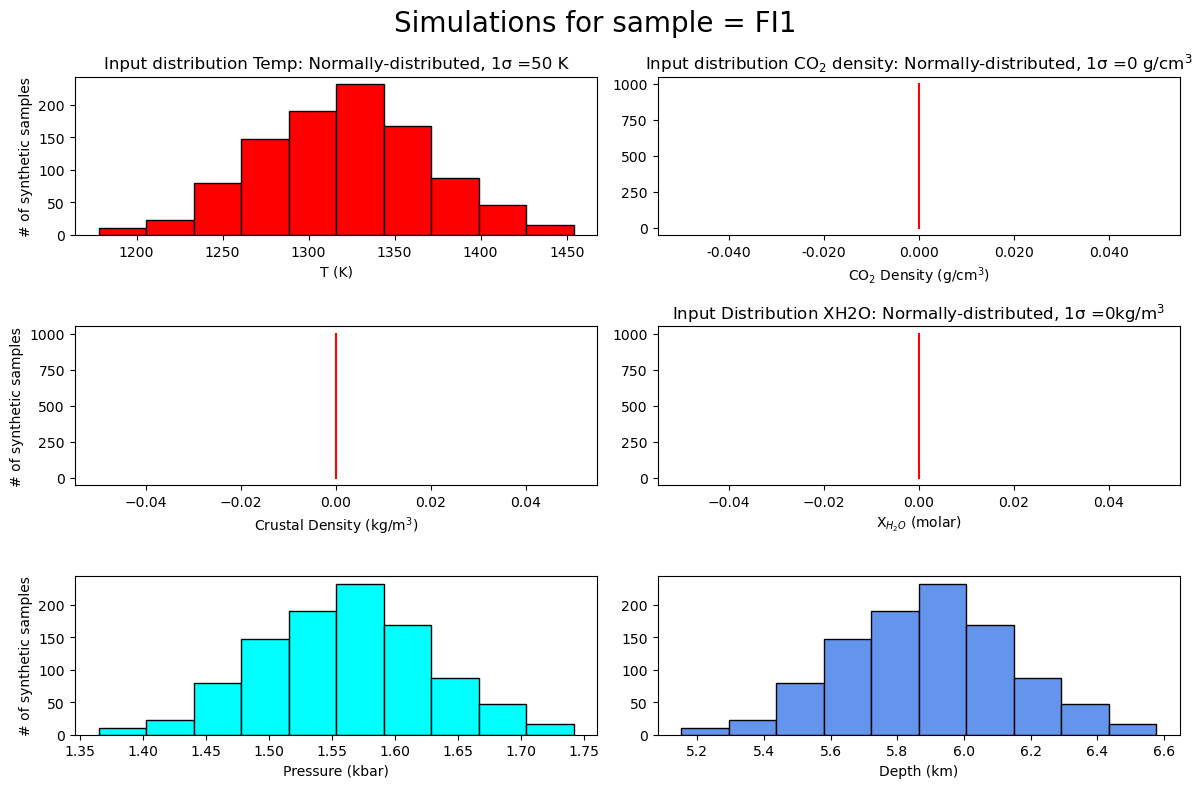

In [3]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

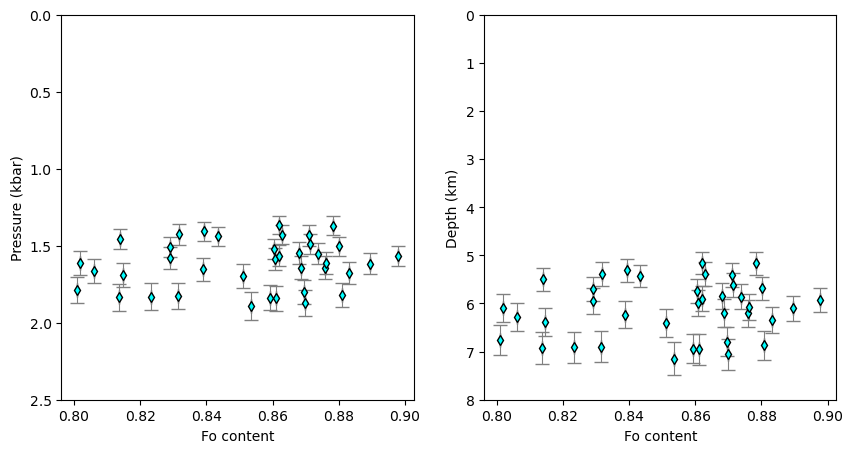

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO2 Density
- Lets say the uncertainty in CO2 density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.562747,1.557184,0.234272,0.232561,5.900052,5.879049,0.884481,0.878018,0,10,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.428826,1.419849,0.214778,0.215179,5.394442,5.360549,0.810882,0.812395,0,10,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.683255,1.670366,0.252847,0.243642,6.355025,6.306360,0.954606,0.919855,0,10,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.880722,1.855248,0.306612,0.301227,7.100548,7.004374,1.157594,1.137265,0,10,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.814364,1.779124,0.305405,0.309431,6.850016,6.716970,1.153036,1.168237,0,10,0.0,1307.970102,0.482227,None,2700,SW96


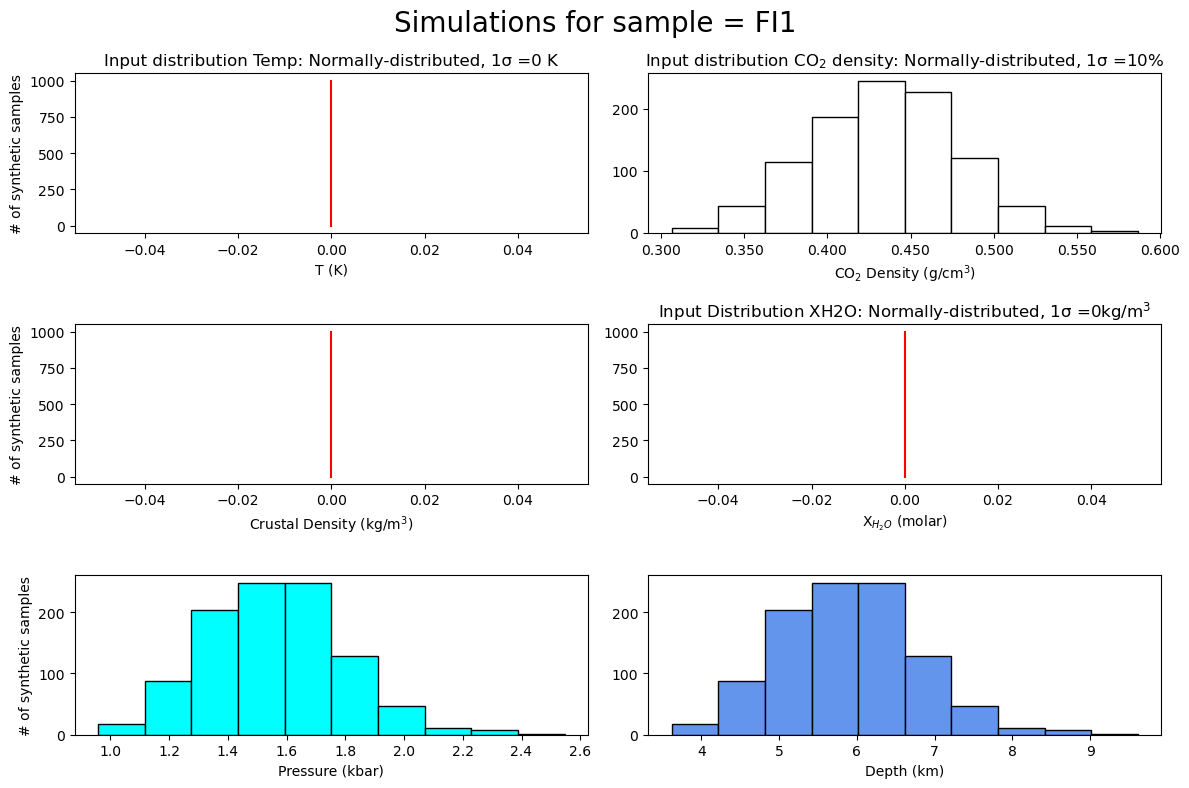

In [5]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.569473,1.567976,0.112611,0.112597,5.925445,5.919793,0.425155,0.425103,30,0.02,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.422514,1.419601,0.107073,0.105456,5.370613,5.359616,0.404246,0.398141,30,0.02,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.679717,1.679252,0.120846,0.117538,6.341667,6.339909,0.456245,0.443758,30,0.02,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.869901,1.865295,0.132190,0.123200,7.059693,7.042305,0.499076,0.465134,30,0.02,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.790080,1.783796,0.127776,0.123557,6.758334,6.734609,0.482411,0.466481,30,0.02,0.0,1307.970102,0.482227,None,2700,SW96


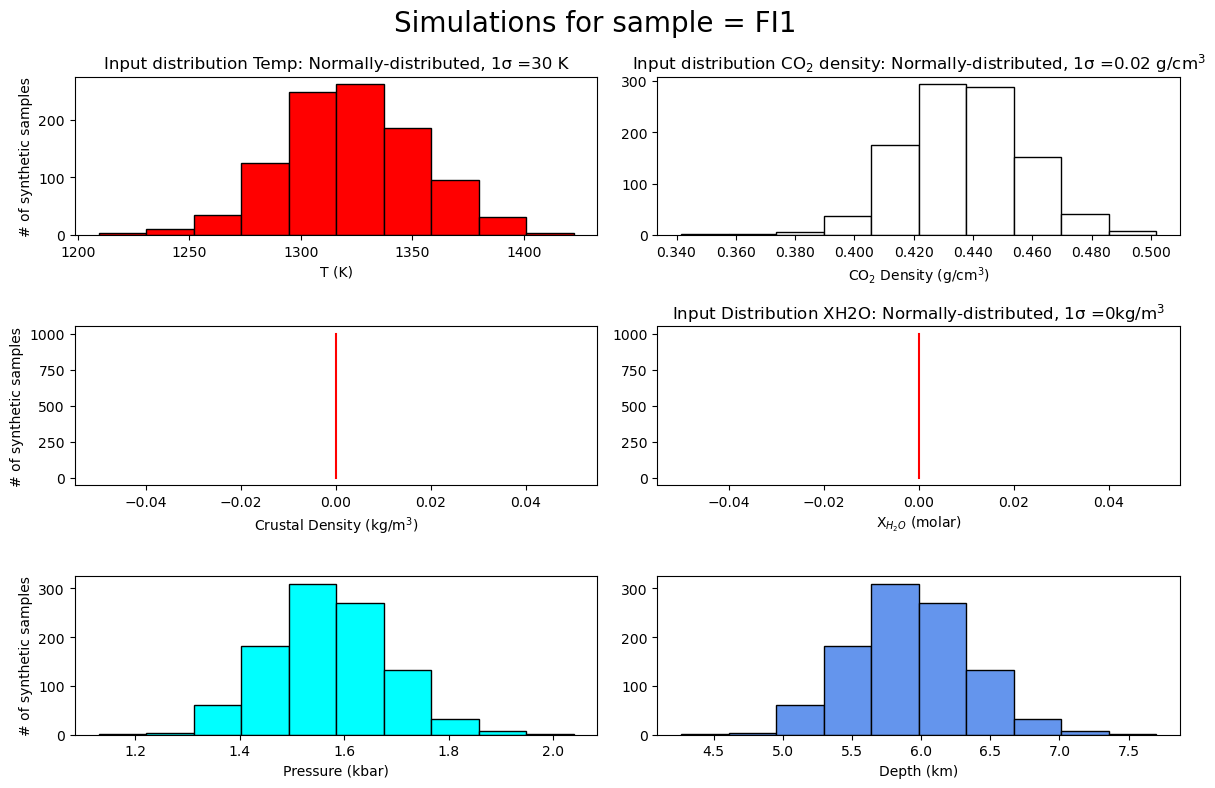

In [6]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO2 and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


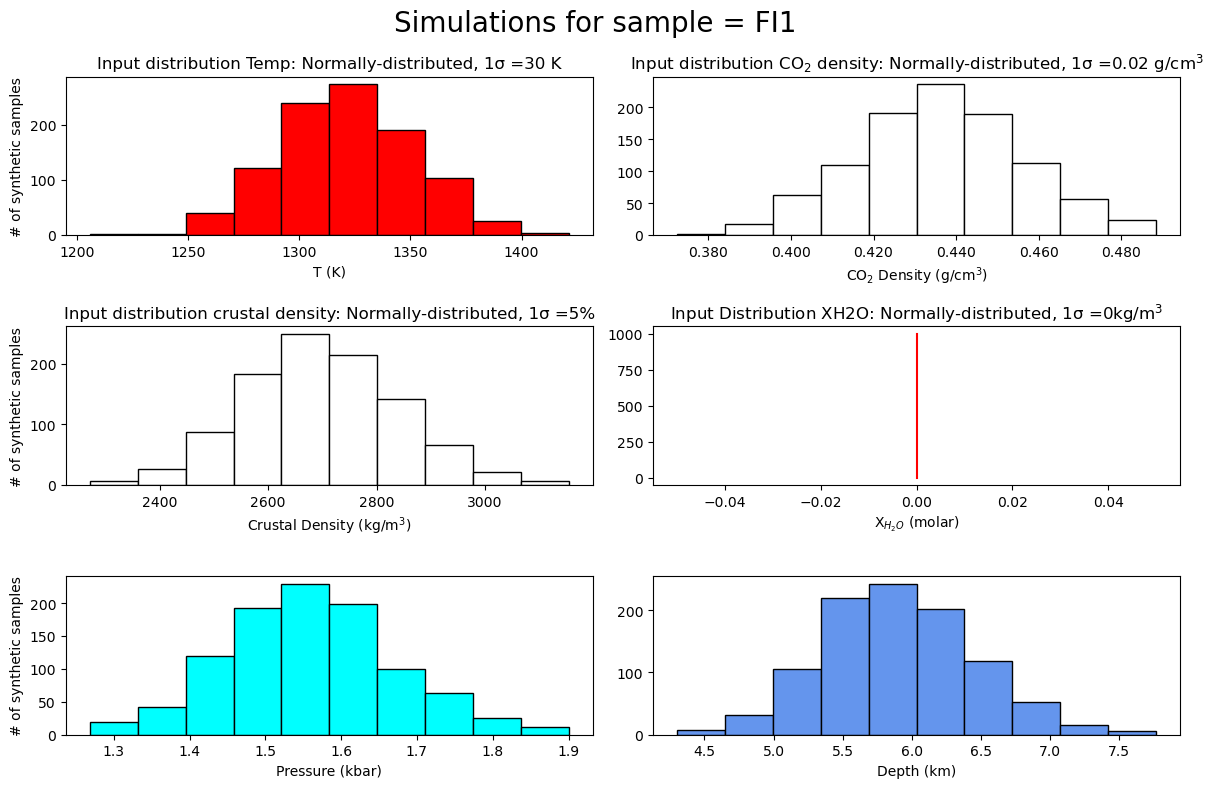

In [7]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )


fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [8]:
MC_Av_rho_T_CD.head()

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.559718,1.557524,0.111936,0.110952,5.907713,5.875934,0.543770,0.547051,30,0.02,135.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427336,1.426201,0.102680,0.102512,5.397603,5.369895,0.476799,0.480445,30,0.02,135.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.676339,1.675746,0.122189,0.123470,6.346557,6.313590,0.564753,0.542774,30,0.02,135.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.872236,1.865286,0.140309,0.145476,7.086169,7.068094,0.646211,0.644955,30,0.02,135.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.795116,1.790326,0.128625,0.125673,6.793973,6.763250,0.591148,0.581529,30,0.02,135.0,1307.970102,0.482227,None,2700,SW96


## Uncertainty in Temp, CO2 density, crustal density and XH2O
- If XH2O is not None, the function will use the EOS of Duan and Zhang (2006) to propagate this additional source of uncertainty. Note, these calculations are an order of magnitude slower, so it may take several minutes to run. 
- Here we consider XH2O=0.1, with a uniformly distributed error of +-0.05

In [9]:

MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
XH2O=0.1, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CDH.head()


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 2006. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
working on sample number 0
working on sample number 20
